D:\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25311 (\N{CJK UNIFIED IDEOGRAPH-62DF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26925 (\N{CJK UNIFIED IDEOGRAPH-692D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22278 (\

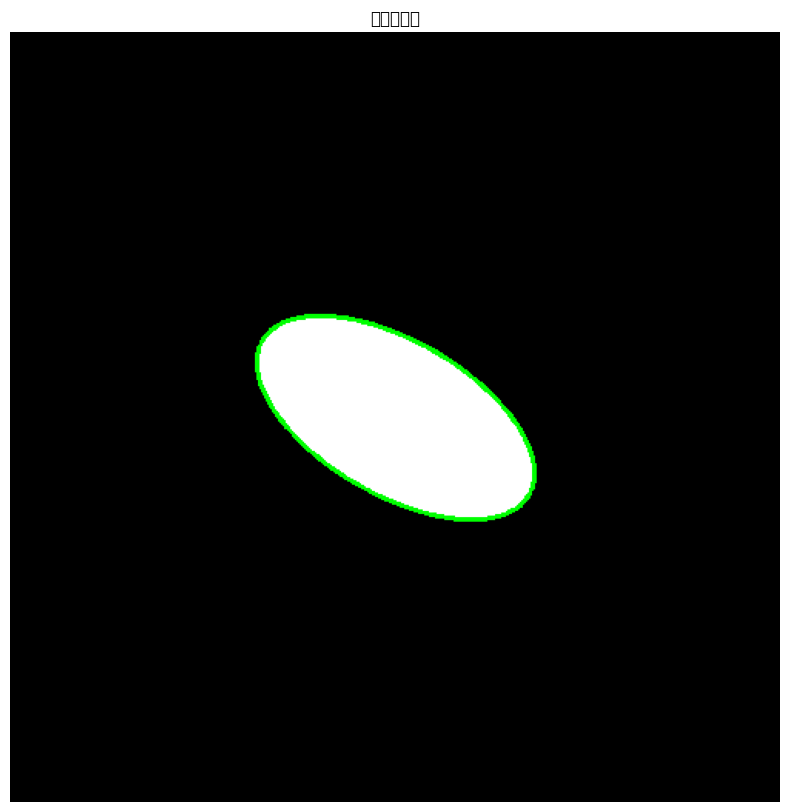

长轴长度: 200.12
短轴长度: 99.96
长轴比例: 0.24
短轴比例: 0.48


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 假设已有实例分割的结果
# mask 是一个二值化的图像，表示轮毂的掩码
# 下面的 mask 示例是一个随机生成的，实际应用中应替换为分割结果中的掩码
mask = np.zeros((500, 500), dtype=np.uint8)
cv2.ellipse(mask, ((250, 250), (200, 100), 30), 255, -1)

# 找到掩码中的轮廓
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 如果找到了轮廓，则拟合椭圆
if len(contours) > 0:
    # 拟合椭圆
    contour = contours[0]
    ellipse = cv2.fitEllipse(contour)
    
    # 获取椭圆参数
    (center, axes, angle) = ellipse
    major_axis_length = max(axes)
    minor_axis_length = min(axes)
    
    # 计算实际长度比例
    actual_length = 48.26  # 轮毂的实际长度为48.26厘米
    major_axis_ratio = actual_length / major_axis_length
    minor_axis_ratio = actual_length / minor_axis_length
    
    # 在图像上绘制椭圆
    output_image = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
    cv2.ellipse(output_image, ellipse, (0, 255, 0), 2)
    
    # 显示结果
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    plt.title('拟合的椭圆')
    plt.axis('off')  # 关闭坐标轴
    plt.show()
    
    print(f"长轴长度: {major_axis_length:.2f}")
    print(f"短轴长度: {minor_axis_length:.2f}")
    print(f"长轴比例: {major_axis_ratio:.2f}")
    print(f"短轴比例: {minor_axis_ratio:.2f}")
else:
    print("掩码中未找到轮廓。")
